# Starting up

Before you start, you need to make sure you run Python or iPython using the Anaconda version. The safest way to do this (unless you know your system set-up already uses Anaconda as the default Python/iPython) is to run Python or iPython directly from the binaries in the Anaconda bin directory (you just need to find out where Anaconda is installed on your system). The pandas module should be included in the Anaconda distribution. You will need to install seaborn separately (you can do so using the pip Python package manager if you have it installed, using the command: pip install seaborn). Note that seaborn is known to be unstable with the matplotlib backend on Mac OS X 10.10. First we need to import the modules we will be using:

In [2]:
import numpy as np
import scipy.stats
import scipy.optimize
import matplotlib.pyplot as plt

# iPython magic command for inline figures. If this command is not given, figures are generated in windows.
# An asterisk appears in the cell prompt (i.e. "In [*]:"), and the kernel stalls until the window is closed.
%matplotlib inline

## Below are two simple examples of exception handling

## Try to import pandas. If not existent, set flag = False, and raise an exception.
try:
    import pandas as pd
    pd_flag = True
except ImportError:
    print("Package pandas not found. Cannot do funky data structures!")
    pd_flag = False
    
## Try to import seaborn.
try:
    import seaborn as sns
    sns_flag = True
    sns.set_style("whitegrid")
    sns.set_style("ticks")
except ImportError:
    sns_flag = False
print("Does seaborn exist on the computer? " + str(sns_flag))

Does seaborn exist on the computer? True


#Looking at some univariate data: Michelson's speed of light experiment

First, let’s load some data. We’ll start with the Michelson speed-of-light measurements (called morley.txt). If the data is in a fairly clean array, this is easily achieved with numpy.loadtxt. We skip the first row (header; by default, rows starting with # will be ignored). The resulting numpy.array will have dimensions of (rows, columns). All we then need to do is extract the columns for further use. Note that python uses zero-based numbering to label elements in a list or array. The first index in any array will always be zero!

It's important to understand the nature of the data before you read it in, so be sure to check this by looking at the data file itself (e.g. via a text editor or other file viewer) before loading it.  For the speed-of-light data we see 4 columns: 

    1   1   850 1
    2   2   740 1
    3   3   900 1
    4   4   1070    1
    5   5   930 1
    6   6   850 1
    7   7   950 1
    8   8   980 1
    9   9   980 1
    10  10  880 1
    11  11  1000    1
    12  12  980 1
    13  13  930 1
    14  14  650 1
    15  15  760 1
    16  16  810 1
    17  17  1000    1
    18  18  1000    1
    19  19  960 1
    20  20  960 1
    21  1   960 2
    22  2   940 2
    23  3   960 2
    24  4   940 2
    ...
    
The 1st column is just an identifier ('row number') for the measurement.  The 2nd column is the 'run' - the measurement within a particular experiment (an experiment consists of 20 measurements).  The 4th column identifies the experiment number.  The crucial measurement itself is the 3rd column - to save on digits this just lists the speed (in km/s) minus 299000.

In [3]:
morley = np.loadtxt("morley.txt", skiprows=1)
print(morley.shape) ## Prints shape of the array as a tuple
run = morley[:,1]
speed = morley[:,2]
experiment = morley[:,3]

(100, 4)


If you're still getting used to data-handling with Python, it is worthwhile to take a look at the data you just read in, e.g.:

In [4]:
print speed

[  850.   740.   900.  1070.   930.   850.   950.   980.   980.   880.
  1000.   980.   930.   650.   760.   810.  1000.  1000.   960.   960.
   960.   940.   960.   940.   880.   800.   850.   880.   900.   840.
   830.   790.   810.   880.   880.   830.   800.   790.   760.   800.
   880.   880.   880.   860.   720.   720.   620.   860.   970.   950.
   880.   910.   850.   870.   840.   840.   850.   840.   840.   840.
   890.   810.   810.   820.   800.   770.   760.   740.   750.   760.
   910.   920.   890.   860.   880.   720.   840.   850.   850.   780.
   890.   840.   780.   810.   760.   810.   790.   810.   820.   850.
   870.   870.   810.   740.   810.   940.   950.   800.   810.   870.]


There are two ways to produce a histogram in Python (assuming the data is loaded as shown above).
First, NumPy has a simple command that returns the edges and counts per bin. The keyword `bins` specifies the number of histogram bins (10 by default), `range` allows the user to predefine a range over which the histogram will be made. If the `density` keyword is set to `True`, the histogram counts will be normalised such that the integral over all bins is 1 (this turns your histogram into a probability density function - more on this later in the course!).  Alternatively, the `hist()` command in matplotlib automatically produces a histogram plot and returns the edges and counts per bin. Note that the keyword `density` is replaced by the keyword `normed` in matplotlib, which does the same thing. For more information on the command and its keywords, type `np.histogram?` or `plt.hist?`.

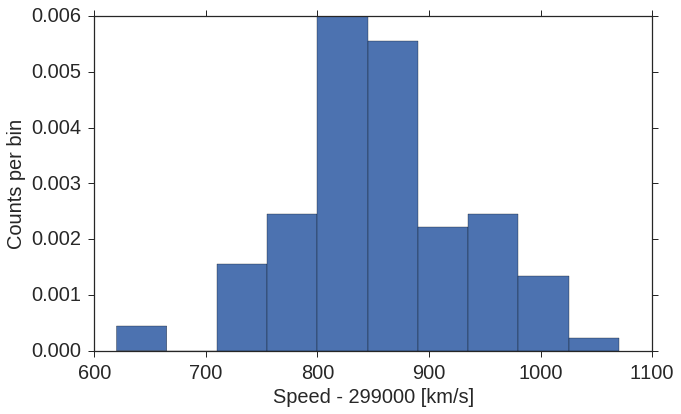

In [5]:
## Set up plot window
fig, ax1 = plt.subplots(1,1,figsize=(10,6))
## Make histogram
counts, edges, patches = ax1.hist(speed, bins=10, range=[np.min(speed), np.max(speed)], normed=True)
ax1.set_xlabel("Speed - 299000 [km/s]", fontsize=20)
ax1.set_ylabel("Counts per bin", fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
plt.show()

Note that it is important to make sure your labels are easily readable by using the `fontsize`/`labelsize` parameters in the commands above!  It is worth spending some time playing with the settings used above to understanding how you can alter the plot to your liking.  

The `np.histogram` command is especially useful to 'bin' univariate data.  Note that patches are matplotlib drawing objects.    Let's look at the values output by the command:

In [6]:
print edges
print counts

[  620.   665.   710.   755.   800.   845.   890.   935.   980.  1025.
  1070.]
[ 0.00044444  0.          0.00155556  0.00244444  0.006       0.00555556
  0.00222222  0.00244444  0.00133333  0.00022222]


Note that there are 11 edges and 10 values for counts, because the edges define the upper and lower limits of the (in this case, 10) contiguous bins used to make the histogram.  The `bins` parameter of the histogram function is used to define the edges of the bins: if it is an integer, that is the number of equal-width bins which is used over `range`.  The binning can also be chosen using various algorithms to optimise different aspects of the data, or specified in advance using a sequence of bin edge values, which can be used to allow non-uniform bin widths:

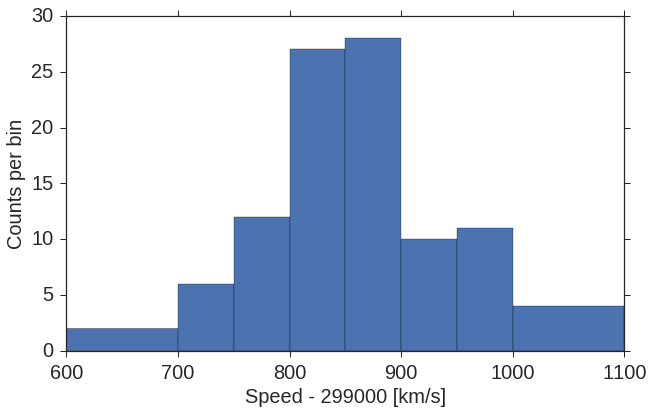

In [7]:
## First define the bin edges:
newbins=[600.,700.,750.,800.,850.,900.,950.,1000.,1100.]
## Now plot
fig, ax1 = plt.subplots(1,1,figsize=(10,6))
counts, edges, patches = ax1.hist(speed, bins=newbins, range=[np.min(speed), np.max(speed)], normed=False)
ax1.set_xlabel("Speed - 299000 [km/s]", fontsize=20)
ax1.set_ylabel("Counts per bin", fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
plt.show()

In what follows we will mostly keep things simple - it is up to you to find out the necessary commands to ensure your labels are clear and make your plots look good (i.e. aesthetically publication worthy)!

We will be running your notebooks later in the course, and thus please be aware of the following:

(1) If there are matplotlib methods which you find yourself typing repeatedly for every piece of code, in general it is worth looking into editing your `matplotlibrc` file. This file is well documented online, and internally via comments. Again we will not go beyond simple formatting methods here, but it is important for you to customise your own plotting routines for rapid data visualisation when conducting scientific research. The path of the `matplotlibrc` file in the Anaconda distribution can be found online for each operating system. <b>However, because edited matplotlibrc files are unique to everyone's distribution, you will instead need to write the code to modify figures within your notebooks</b>.  This can be achieved via dynamic methods (i.e. `rc` and `rcParams`) imported from matplotlib at the top of the notebook; settings can be modified in a similar manner to editing the matplotlibrc file. If you choose to do this, you will have to write fewer lines of code!

(2) `matplotlib` also supports LaTeX typesetting; if the native text rendering with `mathtext` is insufficient for your needs, you can tell `matplotlib` to use the LaTeX distribution on your local machine. Whilst LaTeX is more flexible than `mathtext`, it is considerably slower and should thus be used only to finalise a figure before insertion into a manuscript. To avoid any compatibility issues when we run your notebooks later in the course, <b>please use `mathtext` only</b> to create your figures (i.e. do not try to import auxillary LaTeX packages for instance), and simply be aware that this LaTeX functionality exists for your future research.

###Mean, median and mode

NumPy has fast (C-based and Python-wrapped) implementation for most basic functions, among them the mean and median. Below is an example implementing the speed data in the Morley data set. Computing the mode of a distribution is not as easily done, but it can be read from the histogram, and it should be straightforward for you to write some Python code to do this automatically.

In [8]:
morley_mn = np.mean(speed) + 299000 ## Mean speed with offset added back in
morley_md = np.median(speed) + 299000 ## Median speed with offset added back in
print morley_mn, morley_md

299852.4 299850.0


###Quantiles

The quantiles of a sample can be easily determined using the `scipy.stats.mstats.mquantiles` module:

In [9]:
from scipy.stats.mstats import mquantiles as quantiles

quants = quantiles(speed, [0.25, 0.5, 0.75])
print "The 25th percentile is",quants[0]
print "The 50th percentile is",quants[1]
print "The 75th percentile is",quants[2]

The 25th percentile is 804.5
The 50th percentile is 850.0
The 75th percentile is 895.5


###Variance and standard deviation

NumPy contains functions for both variance and standard deviation:

In [10]:
morley_std = np.std(speed)
morley_var = np.var(speed)
print morley_std, morley_var

78.6145024789 6180.24


But wait!!! Remember Bessel’s correction (Box 2.2 in Vaughan)? The NumPy implementations implicitly assume a ‘degrees-of-freedom’ for the variance calculation of 0. When we use the data itself to estimate the mean, the degrees-of-freedom is set to 1 and we divide the summed variance by  $n − 1$  not  $n$. Thus we need to use:

In [11]:
morley_std = np.std(speed, ddof=1)
morley_var = np.var(speed, ddof=1)
print morley_std, morley_var

79.0105478191 6242.66666667


The lesson is: never use the prepackaged statistical tools in Python (or any statistical algorithm) as ‘black boxes’ - always check the underlying assumptions!

### Calculating with subarrays
Imagine we want to calculate the variance for each of Michelson’s experiments separately. Unlike R, which uses masks, the most Pythonic way would be to phrase this in a list comprehension. The first part of the code below performs this task for a single experiment, the second loops over all five experiments. The function `set()` takes all values in the variable experiment and forms the unique set of these, resulting in the numbers one through five, over which we can then loop.

In [12]:
speed2 = np.array([sp for sp,ex in zip(speed, experiment) if ex == 2.])
v2 = np.var(speed2, ddof=1)
print("The variance for experiment 2 is: %.3f"%v2 + "\n")

## Loop over all experiments
v_all = []
for s in set(experiment):
    v = np.var([sp for sp, ex in zip(speed, experiment) if ex == s], ddof=1)
    print("The variance for experiment %i is: %.3f"%(s, v))
    v_all.append(v)

The variance for experiment 2 is: 3741.053

The variance for experiment 1 is: 11009.474
The variance for experiment 2 is: 3741.053
The variance for experiment 3 is: 6257.895
The variance for experiment 4 is: 3605.000
The variance for experiment 5 is: 2939.737


In Python, it is possible to iterate over a range of indices. For example, `for i in range(10): <do something>` iterates over the numbers 0-9 and executes whatever indented code follows the for-statement. However, it is also possible to iterate over lists directly. The iterating variable then becomes the elements of that list:

In [13]:
mylist = [2, "blue", 10.0, [1,2,3]]
for m in mylist:
    print(m)

2
blue
10.0
[1, 2, 3]


###Standard error

To compute mean, variance and standard error of Morley speed data, you can use `np.var()`, or use `sem()` in `scipy.stats`:

In [14]:
mn = np.mean(speed)
vr = np.var(speed, ddof=1)
se_byhand = np.sqrt(vr/float(len(speed)))
se = scipy.stats.sem(speed) ## Note that for scipy.stats.sem, default ddof=1, so it does not need to be specified
print("SE, by hand: " + str(se_byhand))
print("SE, scipy.stats: " + str(se))

SE, by hand: 7.90105478191
SE, scipy.stats: 7.90105478191


To compute the standard errors on each of the five experiments, reshape the data into a matrix, then compute your desired statistic over one axis of the matrix (make sure you get the right one!). The following code makes 5 rows and 20 columns, such that the data of each experiment are in one row. You could do it the other way around; just make sure to call the command on the right axis -- i.e. choose carefully whether the array should be C-ordered or Fortran-ordered! Most standard NumPy commands that operate on arrays in this way have this option; use it, numpy is (usually) faster than loops. Note that another way to manipulate the NumPy array such that all speeds recorded in one experiment are in the same column is to transpose the array, as we demonstrate below.

Python itself, unlike R, doesn’t really use the concept of data frames (you’d need to go to pandas for that), so the easiest way to store all the information, if you need it more often, is in a dictionary.

In [15]:
rspeed = speed.reshape((5,20), order='C') # Default is C-ordered, so this argument is not required!
# rspeed= speed.reshape((20,5), order='F') # Fortran ordered
## If you want to transpose instead of using the 'order' argument in np.reshape(...) try:
# rspeed.reshape((5,20)).T
rspeed.shape
print(rspeed.shape)
mean_all = np.mean(rspeed, axis=1)
var_all = np.var(rspeed, axis=1, ddof=1)
se_all = scipy.stats.sem(rspeed, axis=1)
se_all_byhand = np.sqrt(np.var(rspeed, axis=1, ddof=1)/rspeed.shape[1])
print(mean_all)
print(var_all)
print(se_all)
print(se_all_byhand)
speed_data = {"data":speed, "mean":mean_all, "var":var_all, "se": se_all}
print speed_data['mean']

(5, 20)
[ 909.   856.   845.   820.5  831.5]
[ 11009.47368421   3741.05263158   6257.89473684   3605.           2939.73684211]
[ 23.46217561  13.6767186   17.68883085  13.42572158  12.12381302]
[ 23.46217561  13.6767186   17.68883085  13.42572158  12.12381302]
[ 909.   856.   845.   820.5  831.5]


We can now plot the means and standard errors for comparison.  We also plot a horizontal line indicating the mean of the entire data set:

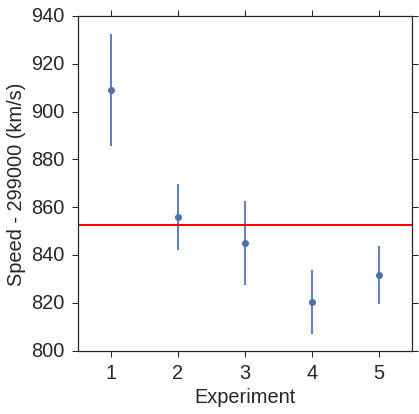

In [16]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.errorbar(np.arange(len(mean_all))+1, mean_all, yerr=se_all,
marker="o", linestyle="")
ax.set_xlim(0.5, 5.5)
ax.set_xlabel("Experiment", fontsize=20)
ax.set_ylabel("Speed - 299000 (km/s)", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
## Plot a horizontal line which shows the mean value of the whole dataset
plt.axhline(y=852.4, linewidth=2, color = 'red')
plt.show()

###A note on precision of reported values and their errors

It is important to stress that Python generally gives a numerical precision from its calculations which is much higher than is needed for reporting estimates of a quantity and their standard errors.  When calculating something as part of a python workflow, as here, that isn't a problem, but if you want to formally report a quantity and its standard error (e.g. in a research paper, project report or thesis), you need to make a sensible choice about what precision you should use.  This should be governed by the size of the errors themselves: there is no point quoting a measurement to much higher precision than the measurement is sensitive to due to its error.  <b>A good rule of thumb is to quote standard errors to 2 significant figures, and then use the number of decimal places of the error to determine the number of decimal places quoted for the measured quantity </b>.  E.g.:

1.5386568 +/- 0.0177236 goes to 1.539 +/- 0.018

125.1879912 +/- 27.9283135 goes to 125 +/- 28

What should we quote for our speed of light measurement (for the whole sample)?

###How consistent is an observed mean with an expected value? (the one-sample $t$-statistic)

To answer this question we use the t-statistic.  The t-statistic for one sample applies when we want to compare the mean of a data sample with an already-known mean.  For example, if we want to assess how accurate Michelson's experiments were, we can compare them to the known speed-of-light (299 792.5 km/s, rounding to 1 decimal place). E.g.:

In [17]:
s = rspeed[0,:] ## first experiment from Morley data set

mean_s = np.mean(s)
mu = 792.5
se_s = np.sqrt(np.var(s, ddof=1)/float(len(s)))
tstat = (mean_s - mu)/se_s

print("The t-statistic is: " + str(tstat))

The t-statistic is: 4.96543892398


This example shows how to calculate the 1-sample t-statistic from the sample mean and variance, but not surprisingly, it is easier to use the built-in version in `scipy.stats`:

In [18]:
tstat2 = scipy.stats.ttest_1samp(s, popmean=792.5)
print("The t-statistic is: " + str(tstat2[0]))

The t-statistic is: 4.96543892398


Here you can see that (for simplicity) the print statement has only printed part of the information given by `scipy.stats.ttest_1samp`.  The full output is:

In [19]:
print tstat2

Ttest_1sampResult(statistic=4.9654389239836041, pvalue=8.5882359808904746e-05)


The first number in the list is the t-statistic value itself, but what is the second number?  In fact it gives a <i>p-value</i>, specifically the probability that, if the sample really is drawn from a population with mean equal to the expected value, we would see such a large t-statistic value by chance.  This essentially gives us an idea about how 'surprised' we should be to see the observed mean value, given what our expectation is.  The t-statistic is carrying the same information but to understand it in terms of a probability we would need to know about the statistical distribution of the t-statistic (which is what the `scipy.stats` version does know, and hence can give the appropriate probability).  We will learn more about how to interpret probabilities and use the distributions of <b>random variables</b> such as the t-statistic over the next few weeks.

Let's now repeat the exercise for all 5 experiments:

In [20]:
tstat2 = scipy.stats.ttest_1samp(rspeed, axis=1, popmean=792.5)
print tstat2

Ttest_1sampResult(statistic=array([ 4.96543892,  4.64292656,  2.96797456,  2.08554898,  3.21680976]), pvalue=array([  8.58823598e-05,   1.77376025e-04,   7.90203889e-03,
         5.07442220e-02,   4.53977440e-03]))


Of the 5 experiments, experiment 4 is most consistent with the expected value of the speed of light.  The overall picture is that there is a systematic error in the measurement.  <b>I.e. the measurements may be precise but they are inaccurate</b>.

###Are two samples drawn from populations with the same mean? (the two-sample $t$-statistic)

We can also ask the question, "if I have two sets of measurements, are they consistent with being drawn from populations with the same mean?".  In the case of Michelson's experiments, we can ask this question to compare the results of different experiments, to see if there is a different systematic error in different experiments.  E.g., comparing experiments 1 and 2:

In [21]:
#other sample
s2 = rspeed[1,:]

mean_s2 = np.mean(s2)
se_s2 = np.sqrt(np.var(s2, ddof=1)/float(len(s2)))
twosamp_tstat = (mean_s - mean_s2)/np.sqrt(se_s**2. + se_s2**2.)
print("2-sample t-statistic: " + str(twosamp_tstat)) # Assuming independent samples

twosamp_tstat_ind = scipy.stats.ttest_ind(s, s2) # Also assuming independent samples
print("Scipy.stats version of 2-sample t-statistic: " + str(twosamp_tstat_ind[0]))
print("Scipy.stats version of 2-sample p-value: " + str(twosamp_tstat_ind[1]) + "\n")

2-sample t-statistic: 1.95158337164
Scipy.stats version of 2-sample t-statistic: 1.95158337164
Scipy.stats version of 2-sample p-value: 0.058387202673



#Bivariate data

### Reformatting and cleaning the Hipparcos data

Our first example data-set here is the Hipparcos data. It is a multivariate data set containing
a lot of information (and we will also use it in the coursework exercises). The raw data file
is formatted in a complex way, so the simplest approach is to first convert the data into a file
(`hip clean.csv`) with a simpler format, using the pandas module. If you have already made
this file, you can skip this step.

In [22]:
hipparcos = np.genfromtxt("hipparcos.txt", dtype=np.float, skip_header=53,
skip_footer=2, autostrip=True)

h = pd.DataFrame(hipparcos[:,1:], index=hipparcos[:,0],
columns=["Rah", "Ram", "Ras", "DECd", "DECm", "DECs", "Vmag",
"Plx", "ePlx", "BV", "eBV"])
hnew = h[:].dropna(how="any") # get rid of NaNs
len(hnew)

# get rid of data with parallax error > 5 per cent
hclean = hnew[hnew.ePlx/np.abs(hnew.Plx) < 0.05]
hclean = hclean[["Vmag", "Plx", "ePlx", "BV", "eBV"]]
hclean["dist"] = 1.e3/hclean["Plx"] # Convert parallax to distance in pc
# Convert to absolute magnitude using distance modulus
hclean["Vabs"] = hclean.Vmag - 5.*(np.log10(hclean.dist) - 1.)

hclean.to_csv("hip_clean.csv")

###Scatter plots in Python

For a basic scatter plot, use `plt.scatter()` on the Hipparcos data. This function has a lot of options to make it look nicer, so you should have a closer look at the documentation to find out about these possibilities. We use pandas again, to read in the cleaned data file we created earlier.

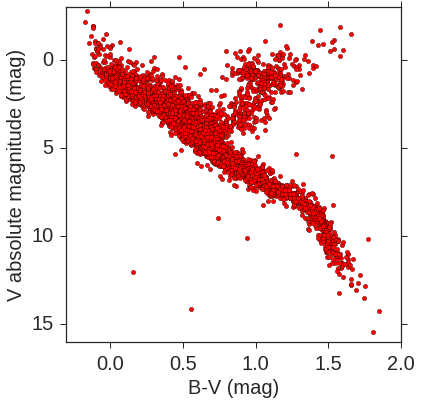

In [23]:
## pandas version of reading in the data
hip_pd = pd.read_csv("hip_clean.csv", index_col=0)

fig, ax1 = plt.subplots(1,1,figsize=(6,6))

ax1.scatter(hip_pd.BV, hip_pd.Vabs, c="red")
ax1.set_xlim(-0.3, 2.0)
ax1.set_ylim(16,-3)
ax1.set_xlabel("B-V (mag)", fontsize=20)
ax1.set_ylabel("V absolute magnitude (mag)", fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
plt.show()

###Computing the correlation coefficient

You can compute the correlation coefficient using `scipy.stats`. The first value is the correlation coefficient, the second the p-value (which will be discussed later). Here we test this approach using randomly generated data (which we also plot on a scatter-plot).  The parameters returned are the correlation co-efficient and an associated p-value:

0.111889567722 0.439166557607


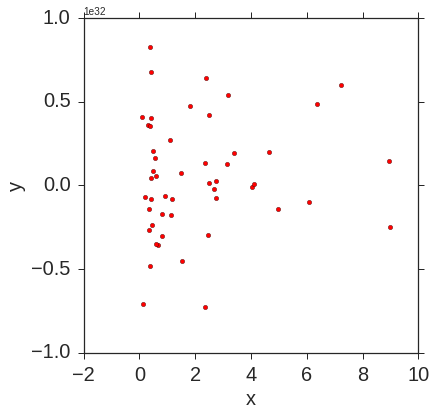

In [24]:
x = np.random.chisquare(2, size=50)
y = x + 30000000000000000000000000000000*np.random.normal(size=50)

(cor, pval) = scipy.stats.pearsonr(x,y)

print cor, pval

fig, ax1 = plt.subplots(1,1,figsize=(6,6))

ax1.scatter(x, y, c="red")
ax1.set_xlabel("x", fontsize=20)
ax1.set_ylabel("y", fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
plt.show()

Notice that the $y$ variable is simply equal to the $x$ variable (which is generated from a chi-squared distribution - more on this later in the course) $plus$ a random variable drawn from a normal distribution. You can reduce or increase the scatter in the correlation by multiplying the random normal variable by some factor (> 1.0 to increase scatter). Try experimenting with this to see what happens to the correlation coefficient. Note that even
if the multiplying factor is not changed, the correlation coefficient will vary due to the random
changes in the sample of data. The variation will decrease if you increase the size of the data
sample (it will get closer to the 'true' correlation coefficient of the underlying population).

###An aside: plotting multivariate data with a scatter-plot matrix

Multivariate data can be shown by plotting each variable against each other variable (with histograms plotted along the diagonal).  This is quite difficult to do in `matplotlib`. It is possible by plotting on a grid and making sure to keep the indices right, but can be quite instructive. Again, we show this using some multi-dimensional fake data drawn from normal distributions:

/home/kriek/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  from ipykernel import kernelapp as app


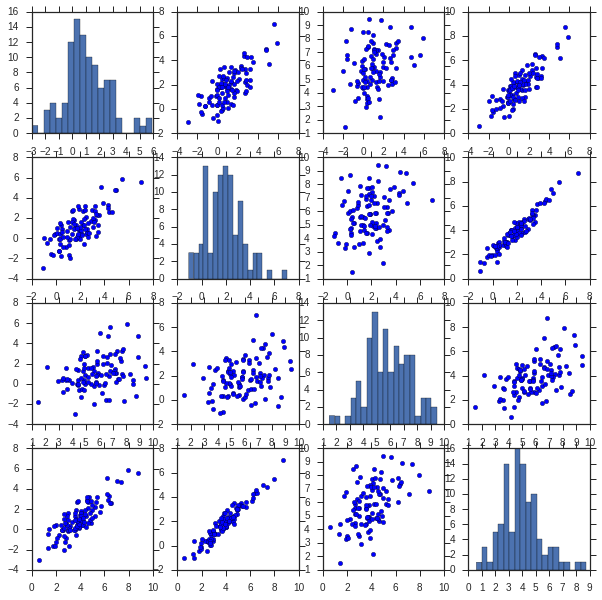

In [28]:
rand_data = np.random.multivariate_normal([1,2,6,4], np.array([[3,2,1,3],
[2,2,1,4], [1,1,3,2], [3,4,2,1]]), size=100)
ndims = rand_data.shape[1]

fig, axes = plt.subplots(4,4,figsize=(10,10))

for i in xrange(ndims): ## x dimension
    for j in xrange(ndims): ## y dimension
        if i == j:
            axes[i,j].hist(rand_data[:,i], bins=20)
        else:
            axes[i,j].scatter(rand_data[:,i], rand_data[:,j])
            
plt.show()